## 1. Load the data and rearrange it as a pandas DataFrame with the following structure:

- One column per stock and concept: Open, High, Low, Close, Adj close per stock
- Date as index (properly parsed)
- Rows sorted by date, ascending

In [1]:
import pandas as pd

In [2]:
stock_raw = pd.read_csv('stocks_unclean.csv', parse_dates=['date'], dayfirst = True, index_col = 'date')
stock_raw.sort_values(by = 'date', ascending = True, inplace = True)

stock_raw.head()

,variable,value
date,,
2019-12-31,high_GOOG,1.338000e+03
2019-12-31,high_AAPL,7.342000e+01
2019-12-31,open_MSFT,1.567700e+02
2019-12-31,volume_MSFT,1.836940e+07
2019-12-31,close_AMZN,1.847840e+03


In [3]:
stock_raw.isna().sum()
# NaN in variable probably indicates bad data, should be dropped
# NaN in value can be imputed and filled once a pivot table is constructed

variable    29
value       78
dtype: int64

In [4]:
# Dropping the null variables (columns)
stock_raw = stock_raw.dropna(subset=['variable'])
stock_raw.isna().sum()

variable     0
value       78
dtype: int64

In [5]:
stock_raw[['variable','company']] = stock_raw['variable'].str.split('_',expand=True)

In [6]:
stock_raw['company'].unique()
# Notice that there are mispelled company names. 

array(['GOOG', 'AAPL', 'MSFT', 'AMZN', 'AMZ', 'APL', 'GOG', 'MST'],
      dtype=object)

In [7]:
stock_raw['company'] = stock_raw['company'].replace(['APL', 'GOG', 'MST', 'AMZ'], ['AAPL', 'GOOG', 'MSFT', 'AMZN'])
stock_raw['company'].unique()

array(['GOOG', 'AAPL', 'MSFT', 'AMZN'], dtype=object)

In [8]:
# Reorder the column so that I can create pivot table
columnsTitles = ['company', 'variable', 'value']
stock_raw = stock_raw.reindex(columns=columnsTitles)
stock_raw.head()

,company,variable,value
date,,,
2019-12-31,GOOG,high,1.338000e+03
2019-12-31,AAPL,high,7.342000e+01
2019-12-31,MSFT,open,1.567700e+02
2019-12-31,MSFT,volume,1.836940e+07
2019-12-31,AMZN,close,1.847840e+03


In [9]:
stock = stock_raw.pivot_table(index=['date'], columns=['company','variable'], values = 'value')
stock.fillna(method = 'ffill', inplace = True)

stock.head()
# The companies that doesn't have the variable info for a specific day have NaN
# This is expected, and I will drop those NaN values

company          AAPL                                                \
variable        close       high        low       open       volume   
date                                                                  
2019-12-31  73.412498  73.419998  72.379997  72.482498  100805600.0   
2020-01-02  75.087502  75.150002  73.797501  74.059998  135480400.0   
2020-01-03  74.357498  75.144997  74.125000  74.287498  146322800.0   
2020-01-06  74.949997  74.989998  73.187500  73.447502  118387200.0   
2020-01-07  74.597504  75.224998  74.370003  74.959999  108872000.0   

company            AMZN                                               \
variable          close         high          low    open     volume   
date                                                                   
2019-12-31  1847.839966  1853.260010  1832.229980  1842.0  2506500.0   
2020-01-02  1898.010010  1898.010010  1864.150024  1875.0  4029000.0   
2020-01-03  1874.969971  1886.199951  1864.500000  1864.5  3764400.0   
2020-01-06  1902.880005  1903.689941  1860.000000  1860.0  4061800.0   
2020-01-07  1906.859985  1913.890015  1892.040039  1904.5  4044900.0   

company            GOOG                                                    \
variable          close         high          low         open     volume   
date                                                                        
2019-12-31  1337.020020  1338.000000  1329.084961  1330.109985   961800.0   
2020-01-02  1367.369995  1368.140015  1341.550049  1341.550049  1406600.0   
2020-01-03  1360.660034  1372.500000  1345.543945  1347.859985  1186400.0   
2020-01-06  1394.209961  1396.500000  1345.543945  1350.000000  1732300.0   
2020-01-07  1393.339966  1402.989990  1390.380005  1397.939941  1502700.0   

company           MSFT                                                  
variable         close        high         low        open      volume  
date                                                                    
2019-12-31  157.699997  157.770004  156.449997  156.770004  18369400.0  
2020-01-02  160.619995  160.729996  158.330002  158.779999  22622100.0  
2020-01-03  158.619995  159.949997  158.330002  158.320007  21116200.0  
2020-01-06  159.029999  159.100006  156.509995  157.080002  20813700.0  
2020-01-07  157.580002  159.669998  157.320007  159.320007  21634100.0

In [10]:
stock.dtypes

company  variable
AAPL     close       float64
         high        float64
         low         float64
         open        float64
         volume      float64
AMZN     close       float64
         high        float64
         low         float64
         open        float64
         volume      float64
GOOG     close       float64
         high        float64
         low         float64
         open        float64
         volume      float64
MSFT     close       float64
         high        float64
         low         float64
         open        float64
         volume      float64
dtype: object

## 2.Visualize the data as follows:

- Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points).
- Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
- Add meaningful visualizations of your choice (0.5 points)

Attach the plots here.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

### 2.1) 2x2 grid of stock open and close
#### Method 1: Using for loop to plot the line charts for each company
This method is leaner and more efficient and avoids repetition 

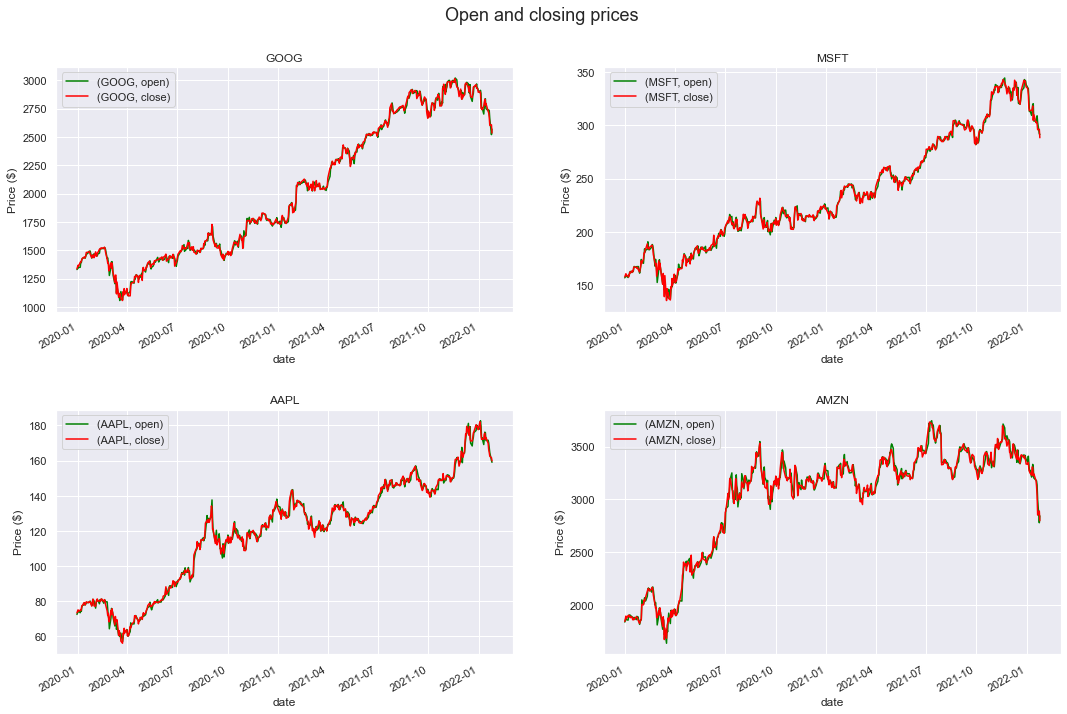

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Open and closing prices", fontsize=18, y=0.95)
companies = ['GOOG','MSFT','AAPL','AMZN']

for company, ax in zip(companies, axs.ravel()):
    stock.loc[:,(company,('open', 'close'))].plot(ax=ax, color = ['green', 'red'])

    ax.set_title(company.upper())
    ax.legend()
    ax.set_ylabel("Price ($)")

plt.show()

#### Method 2: Manually plot each subplot
Although less efficient and more repeatitive, we have more flexibility and control over the parameter for each chart

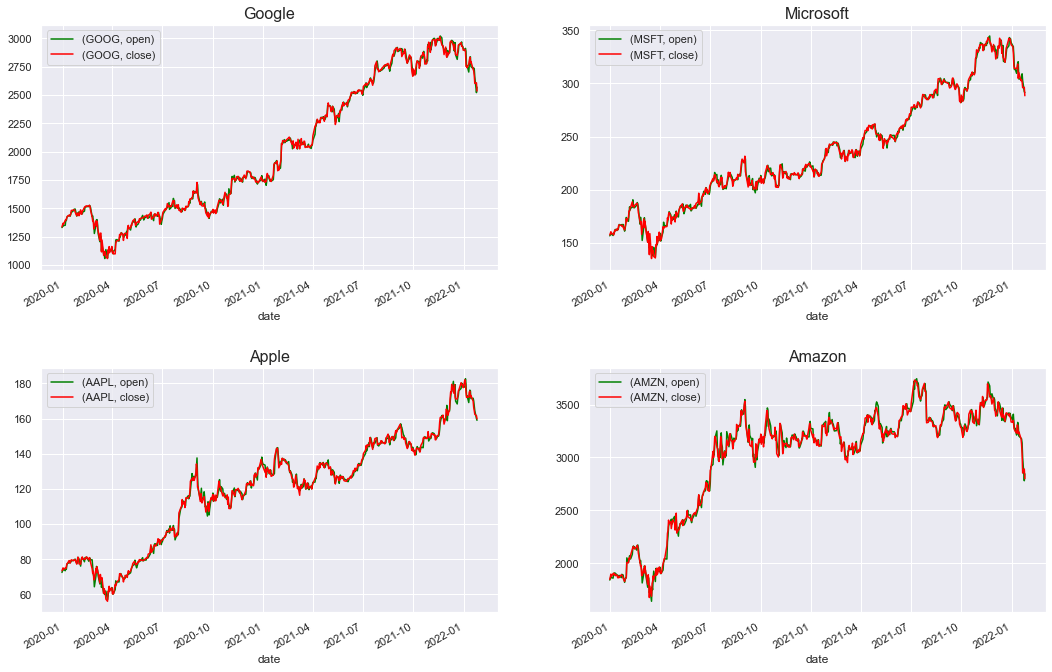

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18,12))
plt.subplots_adjust(hspace=0.4)

stock.loc[:,('GOOG',('open', 'close'))].plot(ax = axes[0,0], color = ['green', 'red'], label= ['Open','Close'])
axes[0,0].set_title('Google',fontsize=16)
axes[0,0].legend(loc="upper left")

stock.loc[:,('MSFT',('open', 'close'))].plot(ax = axes[0,1], color = ['green', 'red'], label= ['Open','Close'])
axes[0,1].set_title('Microsoft',fontsize=16)
axes[0,1].legend(loc="upper left")

stock.loc[:,('AAPL',('open', 'close'))].plot(ax = axes[1,0], color = ['green', 'red'], label= ['Open','Close'])
axes[1,0].set_title('Apple',fontsize=16)
axes[1,0].legend(loc="upper left")

stock.loc[:,('AMZN',('open', 'close'))].plot(ax = axes[1,1], color = ['green', 'red'], label= ['Open','Close'])
axes[1,1].set_title('Amazon',fontsize=16)
axes[1,1].legend(loc="upper left")

### 2.2) 2x2 grid of resampled stock open and close with weekly average
For simplicity, I will stick to the for loop to plot from now to avoid repetition of code

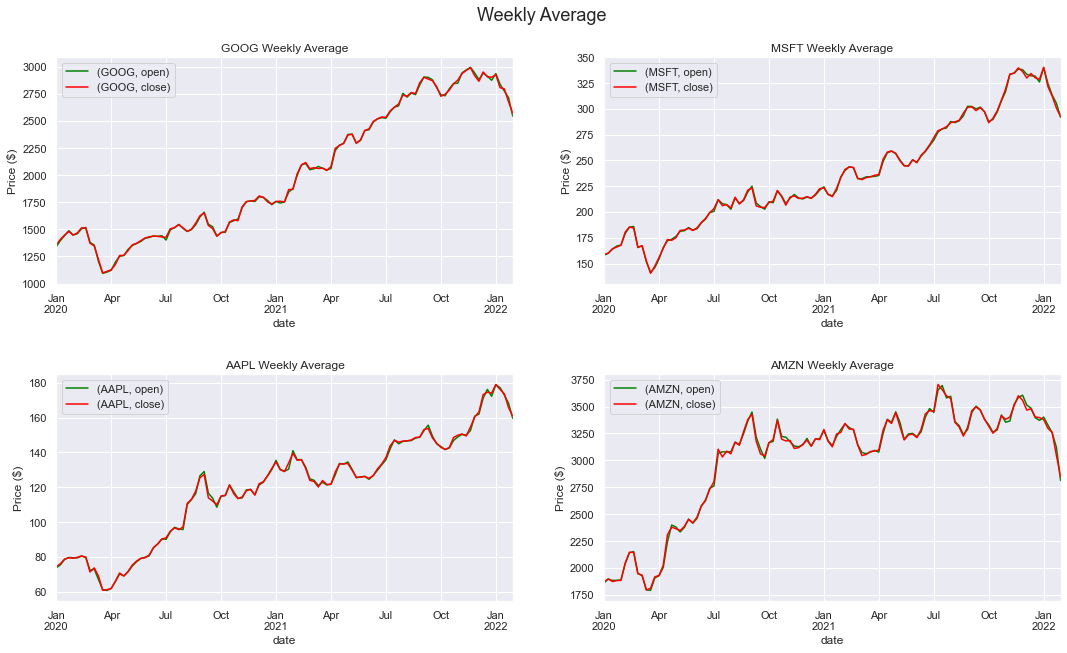

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Weekly Average", fontsize=18, y=0.95)
companies = ['GOOG','MSFT','AAPL','AMZN']

for company, ax in zip(companies, axs.ravel()):
    stock.loc[:,(company,('open', 'close'))].resample('W').mean().plot(ax=ax, color = ['green', 'red'])

    ax.set_title(f'{company.upper()} Weekly Average')
    ax.legend()
    ax.set_ylabel("Price ($)")

plt.show()

### 2.3) Other graph: Original closing price vs Rolling 25 business day vs Monthly average


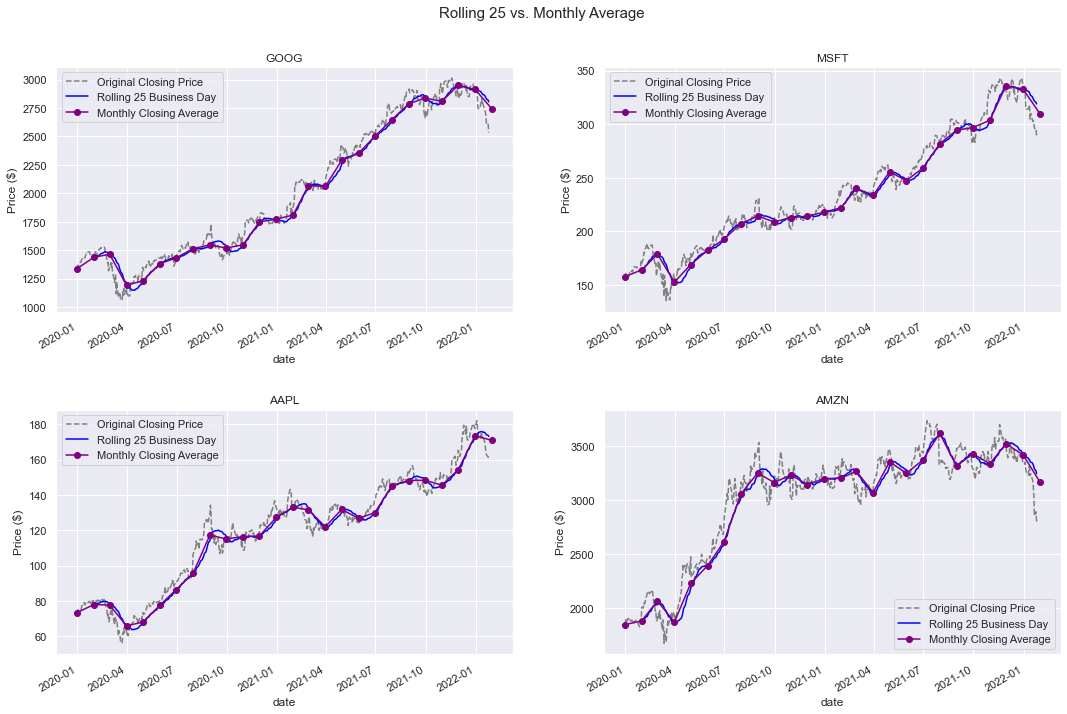

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Rolling 25 vs. Monthly Average", fontsize=15, y=0.95)

companies = ['GOOG','MSFT','AAPL','AMZN']

for company, ax in zip(companies, axs.ravel()):
    stock.loc[:, (company, 'close')].plot(ax=ax, color = 'grey', label='Original Closing Price', linestyle = 'dashed')
    stock.loc[:, (company, 'close')].resample('B').first().fillna(method = "ffill").rolling(25).mean().plot(
        ax=ax,color = 'blue', label='Rolling 25 Business Day')          
    stock.loc[:, (company, 'close')].resample("M").mean().plot(ax=ax, color = 'purple', marker="o", label='Monthly Closing Average')          

    ax.set_title(f'{company.upper()}')
    ax.legend()
    ax.set_ylabel("Price ($)")

plt.show()

## 3.Create a function that calculates the Return of Investment (ROI). 

Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it. The ROI formula is:

$$
ROI = (FVI - IVI)/IVI * 100
$$

- IVI: initial value of investment. This is the price at which you bought the stock
- FVI: final value of investment. This is the price at which you sold the stock
- ROI: Return of Investment. This is the percentage of increase in value of the investment

Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:

- lookback: the number of days you hold the stock
- name: the name of the stock, using the "Close" value of the stock
- data: the dataframe with the stock data

Paste here the result of `roi(365, "GOOG", df)`.



### General Approaches
There are two general approaches finding the IVI and FVI
1. Count 365 rows above, given that the dataset is resampled daily
2. Calculate the exact date 365 back and try to find a match in closing price\
Conclusion: There are pros and cons to each, but *method 1* is preferred because it is more efficient
- Method 1 is faster and leaner, although it might not be _technically_ accurate all the time. The idea is to fill the NaNs to create a daily dataset, including the weekends and when the stock exchange is not operating. Technically speaking, the ROI for that exact lookback will result in NaN, but fillna will help generate a value that is forward filled. 
- Method 2 is _technically_ more accurate, but it is slow and results in a lot of NaNs when there is no perfect match, hence reducing the data sufficiency
- Method 2 has been experimented with, but %timeit shows that it takes 3.5 seconds to run. No bueno! I will only show Method 1 for simplity.

In [16]:
# For method 1 to work, the dataset must have a row for every single day because we can shifting by rows
# Hence, resample daily must be done 

stock_daily = stock.resample('D').first().fillna(method = "ffill")
stock_daily_close = stock_daily.loc[:,(slice(None),'close')]
stock_daily_close.head()

company,AAPL,AMZN,GOOG,MSFT
variable,close,close,close,close
date,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997
2020-01-01,73.412498,1847.839966,1337.020020,157.699997
2020-01-02,75.087502,1898.010010,1367.369995,160.619995
2020-01-03,74.357498,1874.969971,1360.660034,158.619995
2020-01-04,74.357498,1874.969971,1360.660034,158.619995


In [17]:
def ROI_calculator(lookback, name, data):
    '''
    Returns the ROI (%) of a stock with a certain lookback period.

            Parameters:
                    lookback (int): Number of days you're holding the stock
                    name (string): The name of the stock
                    data (pandas.DataFrame): The dataframe that stores the daily stock data

            Returns:
                    ROI (pandas.core.series.Series): ROI % in a Pandas series with date as index
    '''

    FVI = data.loc[:, (name, 'close')]
    IVI = data.shift(lookback).loc[:, (name, 'close')]
    ROI = (FVI - IVI) / IVI * 100
    return ROI.dropna()

In [18]:
ROI_calculator(365, 'GOOG', stock_daily)

date
2020-12-30    30.104261
2020-12-31    31.028704
2021-01-01    28.120407
2021-01-02    28.752220
2021-01-03    28.752220
                ...    
2022-01-21    37.572510
2022-01-22    36.863313
2022-01-23    36.863313
2022-01-24    37.157880
2022-01-25    33.447927
Freq: D, Name: (GOOG, close), Length: 392, dtype: float64

In [19]:
%timeit ROI_calculator(365, 'GOOG', stock_daily)
# This function has a good performance and is quite efficient

1.64 ms ± 88.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 4. Apply the ROI function to the portfolio. 
Create as many ROI columns as different stocks you have in the portfolio and plot them, representing for each stock:

- ROI after holding the stock for 365 days (red, dashed line)
- ROI after holding the stock for 180 days (blue, dotted line) 
- ROI after holding the stock for 90 days (green, solid line) 

Attach here the ROI plots for AMZN.

#### Method 1: Create 12 panda series (4 companies and 3 holding periods) and plot them
The downside to this is that the code is very long and repetitive

In [20]:
GOOG_365 = ROI_calculator(365,'GOOG', stock_daily)
GOOG_180 = ROI_calculator(180,'GOOG', stock_daily)
GOOG_90 = ROI_calculator(90,'GOOG', stock_daily)

MSFT_365 = ROI_calculator(365,'MSFT', stock_daily)
MSFT_180 = ROI_calculator(180,'MSFT', stock_daily)
MSFT_90 = ROI_calculator(90,'MSFT', stock_daily)

AAPL_365 = ROI_calculator(365,'AAPL', stock_daily)
AAPL_180 = ROI_calculator(180,'AAPL', stock_daily)
AAPL_90 = ROI_calculator(90,'AAPL', stock_daily)

AMZN_365 = ROI_calculator(365,'AMZN', stock_daily)
AMZN_180 = ROI_calculator(180,'AMZN', stock_daily)
AMZN_90 = ROI_calculator(90,'AMZN', stock_daily)

Text(0.5, 1.0, 'Amazon')

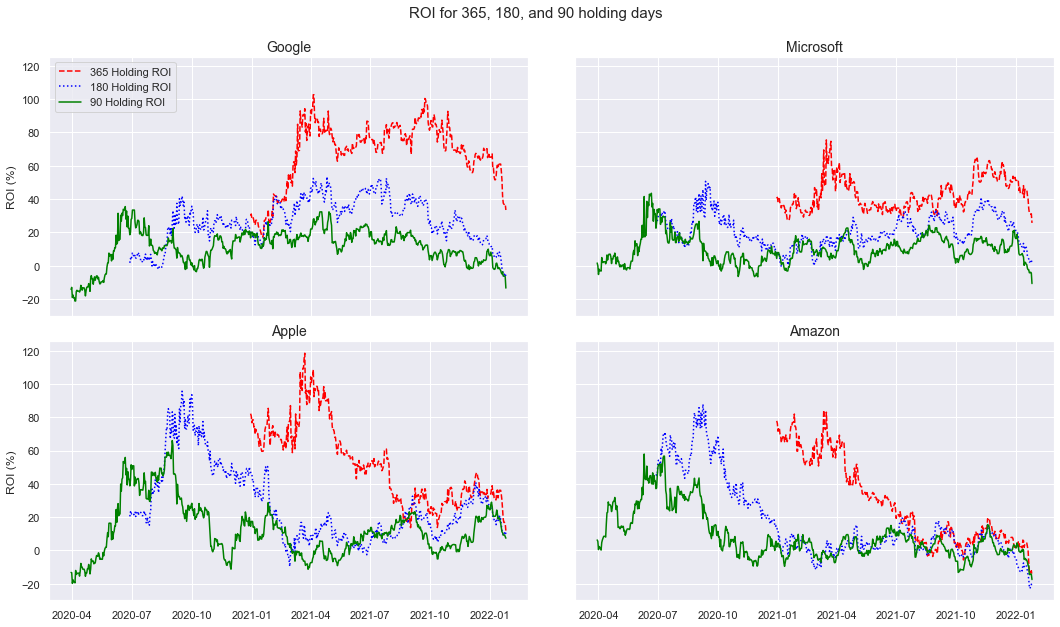

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10), sharex = True, sharey = True)
plt.subplots_adjust(hspace=0.1, wspace = 0.1)
fig.suptitle("ROI for 365, 180, and 90 holding days", fontsize=15, y=0.95)
# sharey controls for the same y axis (ROI) and makes visualization more comparable

#Google
axes[0,0].plot(GOOG_365, color = 'red', label='365 Holding ROI', linestyle = 'dashed')
axes[0,0].plot(GOOG_180, color = 'blue', label='180 Holding ROI', linestyle = 'dotted')
axes[0,0].plot(GOOG_90, color = 'green', label='90 Holding ROI', linestyle = 'solid')
axes[0,0].set_title('Google',fontsize=14)
axes[0,0].legend(loc="upper left")
axes[0,0].set_ylabel('ROI (%)')

#Microsoft
axes[0,1].plot(MSFT_365, color = 'red', label='365 Holding ROI', linestyle = 'dashed')
axes[0,1].plot(MSFT_180, color = 'blue', label='180 Holding ROI', linestyle = 'dotted')
axes[0,1].plot(MSFT_90, color = 'green', label='90 Holding ROI', linestyle = 'solid')
axes[0,1].set_title('Microsoft',fontsize=14)

#Apple
axes[1,0].plot(AAPL_365, color = 'red', label='365 Holding ROI', linestyle = 'dashed')
axes[1,0].plot(AAPL_180, color = 'blue', label='180 Holding ROI', linestyle = 'dotted')
axes[1,0].plot(AAPL_90, color = 'green', label='90 Holding ROI', linestyle = 'solid')
axes[1,0].set_title('Apple',fontsize=14)
axes[1,0].set_ylabel('ROI (%)')

#Amazon
axes[1,1].plot(AMZN_365, color = 'red', label='365 Holding ROI', linestyle = 'dashed')
axes[1,1].plot(AMZN_180, color = 'blue', label='180 Holding ROI', linestyle = 'dotted')
axes[1,1].plot(AMZN_90, color = 'green', label='90 Holding ROI', linestyle = 'solid')
axes[1,1].set_title('Amazon',fontsize=14)

#### Method 2: Using for loop to reduce the amount of code
This method is more efficient and lean, hence preferred

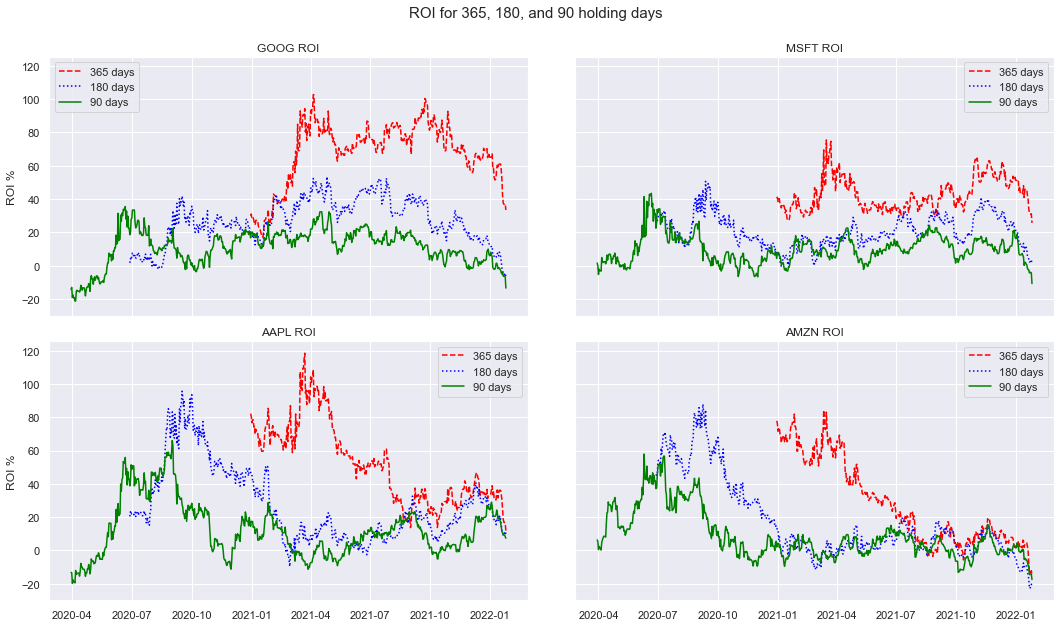

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), sharex = True, sharey = True)
plt.subplots_adjust(hspace=0.1, wspace = 0.1)
fig.suptitle("ROI for 365, 180, and 90 holding days", fontsize=15, y=0.95)

for company, ax in zip(companies, axs.ravel()):
    ax.plot(ROI_calculator(365, company, stock_daily), label = '365 days', color = 'red', linestyle = 'dashed')
    ax.plot(ROI_calculator(180, company, stock_daily), label = '180 days', color = 'blue',  linestyle = 'dotted')
    ax.plot(ROI_calculator(90, company, stock_daily), label = '90 days', color = 'green', linestyle = 'solid')
    ax.set_title(f'{company.upper()} ROI')
    ax.legend()

axs[0,0].set_ylabel('ROI %')
axs[1,0].set_ylabel('ROI %')

plt.show()

## 5. The average ROI is a single number that comes from computing the overall mean of the ROI over the whole period of the series. Given these two portfolios, which one has the best average ROI, with a lookback of 365 days? 

(Keep in mind that ROI is a percentage and you can't average it directly - you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period)


   Portfolio 1:

       AAPL 40%

       GOOG 30%

       MSFT 20%

       AMZN 10%



   Portfolio 2:

       AAPL 30%

       GOOG 20%

       MSFT 10%

       AMZN 40%



Paste here the average ROI of both portfolios (two numbers).

In [23]:
import numpy as np

In [24]:
def weight_ROI(name_list, weight_list, data):
    '''
    Returns the ROI ($) of a weighted portfolio with a lookback period of 365 day.

            Parameters:
                    name_list (list): A list containing the name of four stocks
                    weight_list (list): A list of the corresponding weight 
                    data (pandas.DataFrame): The dataframe that stores the daily stock data

            Returns:
                    weighted_ROI (float64): ROI of the portfolio in currency
    '''
    ROI_company = []
    for company in name_list:
        FVI = data.loc[:, (company, 'close')]
        IVI = data.shift(365).loc[:, (company, 'close')]
        ROI_currency = FVI - IVI    #ROI * IVI is the same as taking the difference between FVI and IVI
        ROI_company.append(ROI_currency.mean())
        
    ROI_currency_array = np.array(ROI_company)
    weighted_ROI = sum(ROI_currency_array * np.array(weight_list))
    return weighted_ROI

In [25]:
name_list = ['AAPL','GOOG', 'MSFT', 'AMZN']
portfolio1 = [0.4, 0.3, 0.2, 0.1] # must follow the name_list order
portfolio2 = [0.3, 0.2, 0.1, 0.4]

In [26]:
port1_return = weight_ROI(name_list, portfolio1, stock_daily)
port2_return = weight_ROI(name_list, portfolio2, stock_daily)
print(f'Portfolio 1 has a return of ${port1_return:.2f} and portfolio 2 has a return of ${port2_return:.2f}')

Portfolio 1 has a return of $402.46 and portfolio 2 has a return of $476.90


## 6. Find a better combination in your portfolio. 
The new combination should beat the best portfolio that you found in the previous exercise.

In [27]:
# The short cut is to invest 100% to the highest returning stock, GOOG. 
# Although this is like cheating the system, I will only display it here for now and go on to a better method

ideal_port = [0, 1, 0, 0]
ideal_return = weight_ROI(name_list, ideal_port, stock_daily)
print(f'If we put 100% to Google, the return will be ${ideal_return:.2f}')

If we put 100% to Google, the return will be $1015.74


In [28]:
# Let's try to randomize the portfolio allocation
# Approach: Simulate 100 different combinations of portfolios and select the one that is max and beats Portfolio 2 from Q5

portfolio_trials = np.random.dirichlet(np.ones(4),size= 100) 

portfolio_ROI = []
for portfolio in portfolio_trials:
    ROIs = weight_ROI(name_list, portfolio, stock_daily)
    portfolio_ROI.append(ROIs)

better_port = pd.DataFrame.from_records(portfolio_trials, columns = name_list)
better_port['ROI']= portfolio_ROI

# A better combination:
better_result = better_port.loc[better_port['ROI'].idxmax(),:]
better_result

AAPL      0.005566
GOOG      0.717422
MSFT      0.058627
AMZN      0.218386
ROI     871.322598
Name: 91, dtype: float64

In [29]:
better_result[4] > (max(port1_return, port2_return))  # This portfolio beats the one from the previous question

True

In [30]:
print(f'The following allocation to Apple, Google, Microsoft, and Amazon: {better_result[0:4].values} results in a higher return.')
print(f'The return of this portfolio is ${better_result[4]:.2f}')

The following allocation to Apple, Google, Microsoft, and Amazon: [0.00556553 0.71742167 0.05862688 0.21838592] results in a higher return.
The return of this portfolio is $871.32


#### FIN
#### Thank you for reading! 